#Step 5
Optimization with uncertain graph weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
#unknown param

customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[[0.         0.1        0.         0.         0.1       ]
 [0.65       0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.66666667 0.         0.         0.         0.        ]]
[[0.         0.24137931 0.         0.         0.06896552]
 [0.64       0.         0.         0.         0.        ]
 [0.25       0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.58823529 0.         0.         0.         0.        ]]
[[0.         0.24193548 0.         0.         0.08064516]
 [0.51219512 0.         0.         0.         0.07317073]
 [0.375      0.         0.         0.0625     0.        ]
 [0.6875     0.         0.         0.         0.        ]
 [0.44827586 0.         0.03448276 0.         0.        ]]
[[0.         0.24242424 0.         0.         0.10606061]
 [0.5121

[[0.         0.3025641  0.         0.         0.08205128]
 [0.47461929 0.         0.         0.         0.03553299]
 [0.39910314 0.         0.         0.14349776 0.        ]
 [0.58064516 0.         0.05483871 0.         0.        ]
 [0.43351064 0.         0.05053191 0.         0.        ]]
[[0.         0.2979798  0.         0.         0.08080808]
 [0.4754902  0.         0.         0.         0.03676471]
 [0.40692641 0.         0.         0.13852814 0.        ]
 [0.58359621 0.         0.05993691 0.         0.        ]
 [0.43958869 0.         0.04884319 0.         0.        ]]
loading: [===                           ] 10.0%
[[0.         0.2992     0.         0.         0.0832    ]
 [0.4754902  0.         0.         0.         0.03676471]
 [0.41493776 0.         0.         0.13692946 0.        ]
 [0.58912387 0.         0.05740181 0.         0.        ]
 [0.4345679  0.         0.04691358 0.         0.        ]]
[[0.         0.29780564 0.         0.         0.0830721 ]
 [0.48356808 0.      

[[0.         0.30455259 0.         0.         0.09026688]
 [0.46984925 0.         0.         0.         0.03517588]
 [0.40702479 0.         0.         0.14256198 0.        ]
 [0.58356941 0.         0.04249292 0.         0.        ]
 [0.43799472 0.         0.04485488 0.         0.        ]]
[[0.         0.30662558 0.         0.         0.09090909]
 [0.46863469 0.         0.         0.         0.03444034]
 [0.41082164 0.         0.         0.14428858 0.        ]
 [0.57836338 0.         0.04160888 0.         0.        ]
 [0.43896104 0.         0.04545455 0.         0.        ]]
[[0.         0.30534351 0.         0.         0.09007634]
 [0.47087379 0.         0.         0.         0.03519417]
 [0.41468254 0.         0.         0.14285714 0.        ]
 [0.57493188 0.         0.04223433 0.         0.        ]
 [0.43701799 0.         0.04498715 0.         0.        ]]
[[0.         0.30451128 0.         0.         0.09022556]
 [0.47009569 0.         0.         0.         0.034689  ]
 [0.4145383

[[0.         0.28951487 0.         0.         0.08763693]
 [0.48039216 0.         0.         0.         0.03267974]
 [0.40830946 0.         0.         0.14613181 0.        ]
 [0.58444023 0.         0.0398482  0.         0.        ]
 [0.42735043 0.         0.05213675 0.         0.        ]]
[[0.         0.29072165 0.         0.         0.08814433]
 [0.47868061 0.         0.         0.         0.03298471]
 [0.40651558 0.         0.         0.14730878 0.        ]
 [0.58669166 0.         0.0393627  0.         0.        ]
 [0.42639594 0.         0.05245347 0.         0.        ]]
[[0.         0.29051988 0.         0.         0.08817533]
 [0.47815727 0.         0.         0.         0.03256553]
 [0.4041958  0.         0.         0.14685315 0.        ]
 [0.58534323 0.         0.03896104 0.         0.        ]
 [0.42737896 0.         0.05342237 0.         0.        ]]
[[0.         0.29056795 0.         0.         0.08772819]
 [0.47870662 0.         0.         0.         0.03233438]
 [0.4008264

[[0.         0.28991109 0.         0.         0.09199845]
 [0.484375   0.         0.         0.         0.02944712]
 [0.39525284 0.         0.         0.1496388  0.        ]
 [0.58509142 0.         0.04149086 0.         0.        ]
 [0.43947037 0.         0.05800757 0.         0.        ]]
[[0.         0.28991109 0.         0.         0.09199845]
 [0.4836212  0.         0.         0.         0.02977963]
 [0.39362795 0.         0.         0.14902364 0.        ]
 [0.58589385 0.         0.04120112 0.         0.        ]
 [0.43796992 0.         0.05827068 0.         0.        ]]
[[0.         0.28877825 0.         0.         0.0926848 ]
 [0.48290094 0.         0.         0.         0.03007075]
 [0.39329268 0.         0.         0.14837398 0.        ]
 [0.58558559 0.         0.04296604 0.         0.        ]
 [0.43808339 0.         0.05787181 0.         0.        ]]
[[0.         0.28907436 0.         0.         0.09370258]
 [0.48302108 0.         0.         0.         0.03044496]
 [0.3929648

[[0.         0.29309811 0.         0.         0.09532652]
 [0.47480989 0.         0.         0.         0.0289924 ]
 [0.38707103 0.         0.         0.15083799 0.        ]
 [0.58420762 0.         0.04362231 0.         0.        ]
 [0.42821031 0.         0.05510617 0.         0.        ]]
[[0.         0.29431644 0.         0.         0.09585253]
 [0.47558685 0.         0.         0.         0.02910798]
 [0.38893281 0.         0.         0.15019763 0.        ]
 [0.58497807 0.         0.0433114  0.         0.        ]
 [0.42864296 0.         0.05458187 0.         0.        ]]
[[0.         0.29508697 0.         0.         0.09581935]
 [0.47625698 0.         0.         0.         0.02886406]
 [0.38770686 0.         0.         0.14972419 0.        ]
 [0.58501914 0.         0.043193   0.         0.        ]
 [0.42835895 0.         0.05453644 0.         0.        ]]
[[0.         0.29615035 0.         0.         0.0957866 ]
 [0.4766528  0.         0.         0.         0.02866389]
 [0.3860610

[[0.         0.29198966 0.         0.         0.09431525]
 [0.47714736 0.         0.         0.         0.03073286]
 [0.37940199 0.         0.         0.14285714 0.        ]
 [0.58847737 0.         0.04389575 0.         0.        ]
 [0.42488362 0.         0.05670758 0.         0.        ]]
[[0.         0.29224448 0.         0.         0.09476117]
 [0.47691706 0.         0.         0.         0.03090767]
 [0.37887789 0.         0.         0.14257426 0.        ]
 [0.58900999 0.         0.04359673 0.         0.        ]
 [0.42490534 0.         0.05679428 0.         0.        ]]
loading: [=================             ] 56.7%
[[0.         0.293143   0.         0.         0.09482539]
 [0.47595035 0.         0.         0.         0.03064391]
 [0.37901639 0.         0.         0.14163934 0.        ]
 [0.58871332 0.         0.04379233 0.         0.        ]
 [0.42588727 0.         0.05636743 0.         0.        ]]
[[0.         0.29265823 0.         0.         0.09468354]
 [0.47727273 0.      

[[0.         0.29328309 0.         0.         0.09377078]
 [0.47336683 0.         0.         0.         0.03048576]
 [0.37386364 0.         0.         0.14261364 0.        ]
 [0.57959815 0.         0.04404946 0.         0.        ]
 [0.41508746 0.         0.05721574 0.         0.        ]]
[[0.         0.29252151 0.         0.         0.09353629]
 [0.47419247 0.         0.         0.         0.03030303]
 [0.37365743 0.         0.         0.14245336 0.        ]
 [0.57953239 0.         0.0436949  0.         0.        ]
 [0.41503977 0.         0.05676067 0.         0.        ]]
[[0.         0.29217926 0.         0.         0.09336555]
 [0.47385837 0.         0.         0.         0.03044341]
 [0.37289089 0.         0.         0.14341957 0.        ]
 [0.57924743 0.         0.04484987 0.         0.        ]
 [0.41537909 0.         0.05641394 0.         0.        ]]
[[0.         0.29188596 0.         0.         0.09320175]
 [0.47429136 0.         0.         0.         0.03032301]
 [0.3726150

[[0.         0.29152937 0.         0.         0.09226594]
 [0.4794561  0.         0.         0.         0.02926397]
 [0.37977194 0.         0.         0.14229053 0.        ]
 [0.5792826  0.         0.04358029 0.         0.        ]
 [0.41844197 0.         0.05405405 0.         0.        ]]
[[0.         0.29110512 0.         0.         0.09222179]
 [0.47881107 0.         0.         0.         0.02913479]
 [0.38139764 0.         0.         0.14271654 0.        ]
 [0.57882432 0.         0.04375418 0.         0.        ]
 [0.41993671 0.         0.05411392 0.         0.        ]]
[[0.         0.29072442 0.         0.         0.0925642 ]
 [0.47874524 0.         0.         0.         0.02961009]
 [0.38242514 0.         0.         0.14383898 0.        ]
 [0.57903494 0.         0.04359401 0.         0.        ]
 [0.41976086 0.         0.05412209 0.         0.        ]]
[[0.         0.29045802 0.         0.         0.09236641]
 [0.47842566 0.         0.         0.         0.02944606]
 [0.3826979

[[0.         0.29005808 0.         0.         0.09190297]
 [0.47743966 0.         0.         0.         0.02885624]
 [0.38816362 0.         0.         0.14142733 0.        ]
 [0.57821901 0.         0.04302046 0.         0.        ]
 [0.41865024 0.         0.05572669 0.         0.        ]]
[[0.         0.28996599 0.         0.         0.0914966 ]
 [0.47818134 0.         0.         0.         0.02874314]
 [0.38744589 0.         0.         0.14069264 0.        ]
 [0.57931034 0.         0.04287856 0.         0.        ]
 [0.4180854  0.         0.05581915 0.         0.        ]]
[[0.         0.29043744 0.         0.         0.09155646]
 [0.47815913 0.         0.         0.         0.02886115]
 [0.38740293 0.         0.         0.14020708 0.        ]
 [0.5799701  0.         0.04334828 0.         0.        ]
 [0.41859171 0.         0.05566379 0.         0.        ]]
[[0.         0.29058387 0.         0.         0.09146136]
 [0.47840703 0.         0.         0.         0.02896302]
 [0.3869995

[[0.         0.29176904 0.         0.         0.09229115]
 [0.48097377 0.         0.         0.         0.02859844]
 [0.39302326 0.         0.         0.14108527 0.        ]
 [0.5785034  0.         0.04380952 0.         0.        ]
 [0.41616314 0.         0.056143   0.         0.        ]]
[[0.         0.29192832 0.         0.         0.09205085]
 [0.48061105 0.         0.         0.         0.02843713]
 [0.39281576 0.         0.         0.14098107 0.        ]
 [0.57781996 0.         0.0436551  0.         0.        ]
 [0.41666667 0.         0.05672691 0.         0.        ]]
[[0.         0.29210566 0.         0.         0.09207513]
 [0.48076923 0.         0.         0.         0.02837711]
 [0.39229287 0.         0.         0.14104046 0.        ]
 [0.57768171 0.         0.04377195 0.         0.        ]
 [0.41714571 0.         0.05648588 0.         0.        ]]
[[0.         0.2922305  0.         0.         0.09183518]
 [0.48094459 0.         0.         0.         0.02875848]
 [0.3921042

[[0.         0.2109375  0.         0.         0.03125   ]
 [0.45       0.         0.         0.         0.05      ]
 [0.40384615 0.         0.         0.09615385 0.        ]
 [0.65432099 0.         0.08641975 0.         0.        ]
 [0.43589744 0.         0.06410256 0.         0.        ]]
[[0.         0.23125    0.         0.         0.05625   ]
 [0.44776119 0.         0.         0.         0.05223881]
 [0.39344262 0.         0.         0.08196721 0.        ]
 [0.63917526 0.         0.09278351 0.         0.        ]
 [0.40816327 0.         0.07142857 0.         0.        ]]
loading: [=                             ] 3.3%
[[0.         0.24468085 0.         0.         0.08510638]
 [0.4527027  0.         0.         0.         0.0472973 ]
 [0.39130435 0.         0.         0.07246377 0.        ]
 [0.63063063 0.         0.08108108 0.         0.        ]
 [0.39130435 0.         0.06086957 0.         0.        ]]
[[0.         0.25       0.         0.         0.08962264]
 [0.44585987 0.       

[[0.         0.2637644  0.         0.         0.08066581]
 [0.48282828 0.         0.         0.         0.03434343]
 [0.40460526 0.         0.         0.12828947 0.        ]
 [0.61012658 0.         0.06075949 0.         0.        ]
 [0.41870824 0.         0.04008909 0.         0.        ]]
[[0.         0.26092385 0.         0.         0.082397  ]
 [0.48336595 0.         0.         0.         0.0332681 ]
 [0.3974359  0.         0.         0.12820513 0.        ]
 [0.61083744 0.         0.06157635 0.         0.        ]
 [0.41364606 0.         0.03837953 0.         0.        ]]
[[0.         0.26634383 0.         0.         0.08232446]
 [0.48015123 0.         0.         0.         0.03213611]
 [0.40125392 0.         0.         0.12539185 0.        ]
 [0.61190476 0.         0.05952381 0.         0.        ]
 [0.42236025 0.         0.03933747 0.         0.        ]]
[[0.         0.26588235 0.         0.         0.08352941]
 [0.47874307 0.         0.         0.         0.03142329]
 [0.4      

[[0.         0.27827897 0.         0.         0.07980569]
 [0.47775424 0.         0.         0.         0.02860169]
 [0.37568058 0.         0.         0.11433757 0.        ]
 [0.62064343 0.         0.05898123 0.         0.        ]
 [0.42543353 0.         0.0416185  0.         0.        ]]
[[0.         0.27815468 0.         0.         0.08005427]
 [0.47554631 0.         0.         0.         0.02809573]
 [0.37188612 0.         0.         0.11565836 0.        ]
 [0.62335958 0.         0.05905512 0.         0.        ]
 [0.42420814 0.         0.04072398 0.         0.        ]]
[[0.         0.27696405 0.         0.         0.08055925]
 [0.47330595 0.         0.         0.         0.02772074]
 [0.37302977 0.         0.         0.117338   0.        ]
 [0.62082262 0.         0.06041131 0.         0.        ]
 [0.42586399 0.         0.04013378 0.         0.        ]]
[[0.         0.27504912 0.         0.         0.0805501 ]
 [0.47118301 0.         0.         0.         0.0273003 ]
 [0.3737024

[[0.         0.27894737 0.         0.         0.08755981]
 [0.47447447 0.         0.         0.         0.02177177]
 [0.35835351 0.         0.         0.11622276 0.        ]
 [0.6134068  0.         0.05785124 0.         0.        ]
 [0.41572123 0.         0.05024311 0.         0.        ]]
[[0.         0.27988615 0.         0.         0.08728653]
 [0.47294292 0.         0.         0.         0.0222387 ]
 [0.35860409 0.         0.         0.11552347 0.        ]
 [0.61454545 0.         0.05818182 0.         0.        ]
 [0.41485069 0.         0.05084746 0.         0.        ]]
[[0.         0.28009368 0.         0.         0.08711944]
 [0.47434018 0.         0.         0.         0.02199413]
 [0.35790725 0.         0.         0.11890606 0.        ]
 [0.61386139 0.         0.05850585 0.         0.        ]
 [0.41533546 0.         0.05031949 0.         0.        ]]
[[0.         0.27994429 0.         0.         0.08774373]
 [0.47656813 0.         0.         0.         0.02162942]
 [0.36     

[[0.         0.27972283 0.         0.         0.08570387]
 [0.47495872 0.         0.         0.         0.02091359]
 [0.36596523 0.         0.         0.12351327 0.        ]
 [0.60863605 0.         0.05757368 0.         0.        ]
 [0.41463415 0.         0.04940588 0.         0.        ]]
[[0.         0.28027556 0.         0.         0.08520667]
 [0.47506849 0.         0.         0.         0.02082192]
 [0.36594203 0.         0.         0.12318841 0.        ]
 [0.60774983 0.         0.05710401 0.         0.        ]
 [0.41527002 0.         0.0496586  0.         0.        ]]
[[0.         0.27985612 0.         0.         0.0852518 ]
 [0.47613883 0.         0.         0.         0.02060738]
 [0.36690647 0.         0.         0.12230216 0.        ]
 [0.60837272 0.         0.05671843 0.         0.        ]
 [0.41574416 0.         0.0498155  0.         0.        ]]
[[0.         0.28040057 0.         0.         0.0851216 ]
 [0.47575431 0.         0.         0.         0.02047414]
 [0.3670546

[[0.         0.28       0.         0.         0.08622222]
 [0.47994652 0.         0.         0.         0.02005348]
 [0.37835821 0.         0.         0.1261194  0.        ]
 [0.60825325 0.         0.0508762  0.         0.        ]
 [0.41795511 0.         0.04887781 0.         0.        ]]
[[0.         0.28007075 0.         0.         0.08637972]
 [0.48047915 0.         0.         0.         0.01996451]
 [0.37795858 0.         0.         0.12647929 0.        ]
 [0.60740325 0.         0.05103758 0.         0.        ]
 [0.41930693 0.         0.05       0.         0.        ]]
loading: [===============               ] 50.0%
[[0.         0.2794593  0.         0.         0.0861005 ]
 [0.47994711 0.         0.         0.         0.02027325]
 [0.37903226 0.         0.         0.12536657 0.        ]
 [0.606466   0.         0.05072464 0.         0.        ]
 [0.41970443 0.         0.04975369 0.         0.        ]]
[[0.         0.28032739 0.         0.         0.08593978]
 [0.4800351  0.      

[[0.         0.27935723 0.         0.         0.08702101]
 [0.48019615 0.         0.         0.         0.02187854]
 [0.38550548 0.         0.         0.12606577 0.        ]
 [0.59785648 0.         0.05172414 0.         0.        ]
 [0.41764214 0.         0.05100334 0.         0.        ]]
[[0.         0.27939006 0.         0.         0.08706345]
 [0.48012003 0.         0.         0.         0.02175544]
 [0.3856883  0.         0.         0.12734991 0.        ]
 [0.59805285 0.         0.05146036 0.         0.        ]
 [0.41511    0.         0.05105853 0.         0.        ]]
[[0.         0.27910959 0.         0.         0.08708415]
 [0.48098434 0.         0.         0.         0.02162565]
 [0.38596491 0.         0.         0.12704174 0.        ]
 [0.59695993 0.         0.05112851 0.         0.        ]
 [0.41508656 0.         0.05152514 0.         0.        ]]
[[0.         0.27914334 0.         0.         0.08736919]
 [0.48090471 0.         0.         0.         0.02150538]
 [0.3866103

[[0.         0.28137524 0.         0.         0.08647965]
 [0.47690306 0.         0.         0.         0.0214704 ]
 [0.38332459 0.         0.         0.12952281 0.        ]
 [0.59418558 0.         0.04978096 0.         0.        ]
 [0.41946903 0.         0.05026549 0.         0.        ]]
[[0.         0.28073856 0.         0.         0.08644566]
 [0.47751537 0.         0.         0.         0.02135231]
 [0.3828125  0.         0.         0.13177083 0.        ]
 [0.59438069 0.         0.04946577 0.         0.        ]
 [0.41836735 0.         0.04996481 0.         0.        ]]
[[0.         0.28070907 0.         0.         0.08633994]
 [0.47714102 0.         0.         0.         0.0212492 ]
 [0.38314374 0.         0.         0.13133402 0.        ]
 [0.59463722 0.         0.04968454 0.         0.        ]
 [0.41672498 0.         0.04968509 0.         0.        ]]
[[0.         0.28039909 0.         0.         0.08626065]
 [0.47674046 0.         0.         0.         0.02117421]
 [0.3822771

[[0.         0.27705948 0.         0.         0.08496491]
 [0.47733711 0.         0.         0.         0.02067989]
 [0.38724374 0.         0.         0.12984055 0.        ]
 [0.59259259 0.         0.0512288  0.         0.        ]
 [0.41274752 0.         0.04857673 0.         0.        ]]
[[0.         0.27757353 0.         0.         0.08529412]
 [0.47730476 0.         0.         0.         0.02058077]
 [0.38727273 0.         0.         0.12954545 0.        ]
 [0.59331956 0.         0.05130854 0.         0.        ]
 [0.41245376 0.         0.0487053  0.         0.        ]]
[[0.         0.27769653 0.         0.         0.08555759]
 [0.4785052  0.         0.         0.         0.02079236]
 [0.38753388 0.         0.         0.12962963 0.        ]
 [0.5927447  0.         0.0513347  0.         0.        ]
 [0.41232373 0.         0.04843654 0.         0.        ]]
[[0.         0.27733236 0.         0.         0.08582362]
 [0.47799271 0.         0.         0.         0.02102607]
 [0.3875168

[[0.         0.27510701 0.         0.         0.08725716]
 [0.48104146 0.         0.         0.         0.02300303]
 [0.39766317 0.         0.         0.12852538 0.        ]
 [0.59076828 0.         0.05080545 0.         0.        ]
 [0.41441692 0.         0.05009741 0.         0.        ]]
[[0.         0.27556212 0.         0.         0.08780568]
 [0.48062406 0.         0.         0.         0.02315048]
 [0.39726578 0.         0.         0.12866908 0.        ]
 [0.59054388 0.         0.05098888 0.         0.        ]
 [0.4145394  0.         0.04994451 0.         0.        ]]
[[0.         0.27495507 0.         0.         0.08756739]
 [0.48080301 0.         0.         0.         0.02308657]
 [0.39767721 0.         0.         0.12895475 0.        ]
 [0.59118916 0.         0.05083179 0.         0.        ]
 [0.41475546 0.         0.0497375  0.         0.        ]]
[[0.         0.27469487 0.         0.         0.08771359]
 [0.48150925 0.         0.         0.         0.02323838]
 [0.3978451

[[0.         0.27589286 0.         0.         0.08645833]
 [0.48251748 0.         0.         0.         0.02346041]
 [0.39844329 0.         0.         0.13306153 0.        ]
 [0.59065782 0.         0.05002764 0.         0.        ]
 [0.4189902  0.         0.04998744 0.         0.        ]]
[[0.         0.2760463  0.         0.         0.08637578]
 [0.48211474 0.         0.         0.         0.02339708]
 [0.39859882 0.         0.         0.13311209 0.        ]
 [0.58965897 0.         0.05005501 0.         0.        ]
 [0.41915267 0.         0.04988719 0.         0.        ]]
loading: [============================= ] 96.7%
[[0.         0.27583149 0.         0.         0.0864745 ]
 [0.48218687 0.         0.         0.         0.02352678]
 [0.39853211 0.         0.         0.13321101 0.        ]
 [0.5890411  0.         0.05041096 0.         0.        ]
 [0.41837244 0.         0.04967549 0.         0.        ]]
[[0.         0.27718111 0.         0.         0.08621451]
 [0.48302055 0.      

[[0.         0.28220859 0.         0.         0.07055215]
 [0.49779736 0.         0.         0.         0.03964758]
 [0.40707965 0.         0.         0.07964602 0.        ]
 [0.59903382 0.         0.03864734 0.         0.        ]
 [0.44387755 0.         0.0255102  0.         0.        ]]
[[0.         0.28242075 0.         0.         0.06916427]
 [0.50409836 0.         0.         0.         0.03688525]
 [0.4017094  0.         0.         0.07692308 0.        ]
 [0.59090909 0.         0.04090909 0.         0.        ]
 [0.45581395 0.         0.02325581 0.         0.        ]]
[[0.         0.28455285 0.         0.         0.0704607 ]
 [0.4921875  0.         0.         0.         0.0390625 ]
 [0.4015748  0.         0.         0.1023622  0.        ]
 [0.59663866 0.         0.04201681 0.         0.        ]
 [0.45258621 0.         0.02155172 0.         0.        ]]
loading: [==                            ] 6.7%
[[0.         0.28678304 0.         0.         0.07481297]
 [0.48496241 0.       

[[0.         0.28391167 0.         0.         0.07781283]
 [0.47900467 0.         0.         0.         0.03265941]
 [0.42382271 0.         0.         0.11911357 0.        ]
 [0.5989011  0.         0.04212454 0.         0.        ]
 [0.43711656 0.         0.03680982 0.         0.        ]]
[[0.         0.28179044 0.         0.         0.07833164]
 [0.48012232 0.         0.         0.         0.03211009]
 [0.42265193 0.         0.         0.11878453 0.        ]
 [0.60071942 0.         0.04136691 0.         0.        ]
 [0.43759398 0.         0.03759398 0.         0.        ]]
[[0.         0.28143713 0.         0.         0.07784431]
 [0.48224852 0.         0.         0.         0.03106509]
 [0.42473118 0.         0.         0.11827957 0.        ]
 [0.59859155 0.         0.04049296 0.         0.        ]
 [0.43657817 0.         0.03834808 0.         0.        ]]
[[0.         0.28075397 0.         0.         0.07738095]
 [0.47813411 0.         0.         0.         0.03206997]
 [0.4244031

[[0.         0.29375765 0.         0.         0.08629131]
 [0.48130841 0.         0.         0.         0.0271028 ]
 [0.41167192 0.         0.         0.14195584 0.        ]
 [0.59497817 0.         0.04039301 0.         0.        ]
 [0.41650485 0.         0.03883495 0.         0.        ]]
[[0.         0.29433052 0.         0.         0.08624849]
 [0.47941446 0.         0.         0.         0.02653248]
 [0.4125     0.         0.         0.140625   0.        ]
 [0.59567568 0.         0.04       0.         0.        ]
 [0.41954023 0.         0.04214559 0.         0.        ]]
[[0.         0.29565735 0.         0.         0.08625818]
 [0.47920434 0.         0.         0.         0.02622061]
 [0.41321045 0.         0.         0.14132104 0.        ]
 [0.59401709 0.         0.03952991 0.         0.        ]
 [0.41856061 0.         0.04166667 0.         0.        ]]
[[0.         0.29707602 0.         0.         0.08538012]
 [0.4808207  0.         0.         0.         0.02676182]
 [0.4146341

[[0.         0.29367867 0.         0.         0.0856014 ]
 [0.46598639 0.         0.         0.         0.02653061]
 [0.37763012 0.         0.         0.13621262 0.        ]
 [0.59409888 0.         0.0446571  0.         0.        ]
 [0.41910739 0.         0.04253835 0.         0.        ]]
[[0.         0.29342621 0.         0.         0.08619939]
 [0.46698113 0.         0.         0.         0.02695418]
 [0.37731734 0.         0.         0.13522356 0.        ]
 [0.59399684 0.         0.04423381 0.         0.        ]
 [0.41902136 0.         0.04341833 0.         0.        ]]
[[0.         0.29242033 0.         0.         0.08570198]
 [0.46791444 0.         0.         0.         0.02673797]
 [0.37785016 0.         0.         0.13463626 0.        ]
 [0.59624413 0.         0.04460094 0.         0.        ]
 [0.42126789 0.         0.04294479 0.         0.        ]]
[[0.         0.29248506 0.         0.         0.0853971 ]
 [0.47132498 0.         0.         0.         0.02768622]
 [0.3752688

[[0.         0.28705964 0.         0.         0.08859435]
 [0.48335975 0.         0.         0.         0.03169572]
 [0.37934028 0.         0.         0.13541667 0.        ]
 [0.59096612 0.         0.04454203 0.         0.        ]
 [0.4227027  0.         0.04432432 0.         0.        ]]
loading: [=============                 ] 43.3%
[[0.         0.28675199 0.         0.         0.08889658]
 [0.48243314 0.         0.         0.         0.03146303]
 [0.38050043 0.         0.         0.13632442 0.        ]
 [0.58969584 0.         0.044072   0.         0.        ]
 [0.42404724 0.         0.04401503 0.         0.        ]]
[[0.         0.287183   0.         0.         0.08978753]
 [0.48304643 0.         0.         0.         0.0312989 ]
 [0.37948718 0.         0.         0.13760684 0.        ]
 [0.58856089 0.         0.04489545 0.         0.        ]
 [0.42242295 0.         0.04410202 0.         0.        ]]
[[0.         0.28629718 0.         0.         0.08976539]
 [0.48211509 0.      

[[0.         0.28279387 0.         0.         0.08716638]
 [0.48162393 0.         0.         0.         0.02863248]
 [0.38521127 0.         0.         0.13591549 0.        ]
 [0.58016444 0.         0.04367934 0.         0.        ]
 [0.42192982 0.         0.04342105 0.         0.        ]]
[[0.         0.28280543 0.         0.         0.08710407]
 [0.48168654 0.         0.         0.         0.02896082]
 [0.38391608 0.         0.         0.13566434 0.        ]
 [0.57980622 0.         0.04385518 0.         0.        ]
 [0.42128216 0.         0.04361099 0.         0.        ]]
[[0.         0.28359046 0.         0.         0.08695652]
 [0.48091603 0.         0.         0.         0.028838  ]
 [0.38333333 0.         0.         0.13611111 0.        ]
 [0.57966616 0.         0.04350025 0.         0.        ]
 [0.42096146 0.         0.04330879 0.         0.        ]]
loading: [================              ] 53.3%
[[0.         0.28479777 0.         0.         0.08675035]
 [0.47875473 0.      

[[0.         0.28200817 0.         0.         0.08623589]
 [0.48417606 0.         0.         0.         0.02910149]
 [0.38078292 0.         0.         0.13285884 0.        ]
 [0.58026316 0.         0.04517544 0.         0.        ]
 [0.42670157 0.         0.04450262 0.         0.        ]]
[[0.         0.28270749 0.         0.         0.08634298]
 [0.48445409 0.         0.         0.         0.02892263]
 [0.38038984 0.         0.         0.13290018 0.        ]
 [0.58009603 0.         0.04539502 0.         0.        ]
 [0.42580885 0.         0.04462626 0.         0.        ]]
[[0.         0.28320266 0.         0.         0.08648135]
 [0.48596112 0.         0.         0.         0.0287977 ]
 [0.38254247 0.         0.         0.13239602 0.        ]
 [0.58082789 0.         0.0453159  0.         0.        ]
 [0.42439926 0.         0.04510166 0.         0.        ]]
[[0.         0.28189981 0.         0.         0.08695652]
 [0.48376739 0.         0.         0.         0.02889761]
 [0.3825934

[[0.         0.28577354 0.         0.         0.08668602]
 [0.48146985 0.         0.         0.         0.02795226]
 [0.38329876 0.         0.         0.13174274 0.        ]
 [0.57966616 0.         0.04514416 0.         0.        ]
 [0.42326333 0.         0.04588045 0.         0.        ]]
[[0.         0.28600908 0.         0.         0.08625671]
 [0.4815625  0.         0.         0.         0.028125  ]
 [0.38239835 0.         0.         0.13072568 0.        ]
 [0.58015843 0.         0.04526594 0.         0.        ]
 [0.42411576 0.         0.04598071 0.         0.        ]]
[[0.         0.28612539 0.         0.         0.08591984]
 [0.48195395 0.         0.         0.         0.02800249]
 [0.38268443 0.         0.         0.13063525 0.        ]
 [0.58060879 0.         0.04509583 0.         0.        ]
 [0.4238538  0.         0.04616864 0.         0.        ]]
[[0.         0.28600697 0.         0.         0.08604794]
 [0.48159604 0.         0.         0.         0.02783792]
 [0.3821428

[[0.         0.28508852 0.         0.         0.08596459]
 [0.48325096 0.         0.         0.         0.02883031]
 [0.38319024 0.         0.         0.13059196 0.        ]
 [0.57990716 0.         0.04608753 0.         0.        ]
 [0.42100769 0.         0.04839169 0.         0.        ]]
[[0.         0.28524709 0.         0.         0.08630087]
 [0.48344733 0.         0.         0.         0.02872777]
 [0.38274933 0.         0.         0.13072776 0.        ]
 [0.58030403 0.         0.04593523 0.         0.        ]
 [0.4208286  0.         0.04824064 0.         0.        ]]
[[0.         0.28592084 0.         0.         0.08621001]
 [0.48309706 0.         0.         0.         0.02862595]
 [0.38310237 0.         0.         0.13053196 0.        ]
 [0.58069829 0.         0.04611331 0.         0.        ]
 [0.42123094 0.         0.04856014 0.         0.        ]]
[[0.         0.28607458 0.         0.         0.08629076]
 [0.4825061  0.         0.         0.         0.02847844]
 [0.3833481

[[0.         0.28496987 0.         0.         0.08663084]
 [0.48402829 0.         0.         0.         0.02852963]
 [0.38542086 0.         0.         0.13612565 0.        ]
 [0.57908768 0.         0.04472749 0.         0.        ]
 [0.41920732 0.         0.04979675 0.         0.        ]]
loading: [===========================   ] 90.0%
[[0.         0.28483374 0.         0.         0.08694242]
 [0.48459859 0.         0.         0.         0.0283774 ]
 [0.38461538 0.         0.         0.13621795 0.        ]
 [0.57919622 0.         0.04491726 0.         0.        ]
 [0.4190693  0.         0.04957006 0.         0.        ]]
[[0.         0.28504446 0.         0.         0.08682296]
 [0.48467294 0.         0.         0.         0.02824041]
 [0.38430904 0.         0.         0.13659896 0.        ]
 [0.57831325 0.         0.04466647 0.         0.        ]
 [0.41904521 0.         0.04976004 0.         0.        ]]
[[0.         0.28509337 0.         0.         0.08692853]
 [0.48532243 0.      

[[0.         0.28668138 0.         0.         0.08682855]
 [0.48797175 0.         0.         0.         0.02935334]
 [0.38047016 0.         0.         0.13526221 0.        ]
 [0.57967545 0.         0.04416068 0.         0.        ]
 [0.41834142 0.         0.04943405 0.         0.        ]]
[[0.         0.28674098 0.         0.         0.08653564]
 [0.48778878 0.         0.         0.         0.02948295]
 [0.3801444  0.         0.         0.13501805 0.        ]
 [0.57968709 0.         0.04428534 0.         0.        ]
 [0.41804788 0.         0.04972376 0.         0.        ]]
[[0.         0.28700862 0.         0.         0.0866579 ]
 [0.48873332 0.         0.         0.         0.02953402]
 [0.3799928  0.         0.         0.13530047 0.        ]
 [0.58051742 0.         0.04408659 0.         0.        ]
 [0.41794813 0.         0.0495754  0.         0.        ]]


(3, 300)

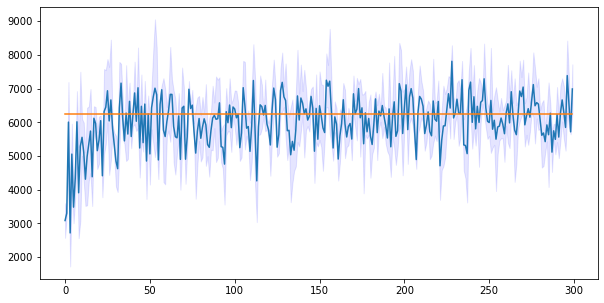

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

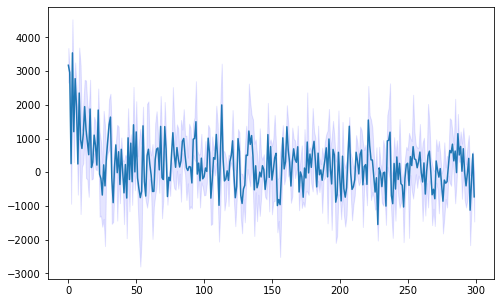

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

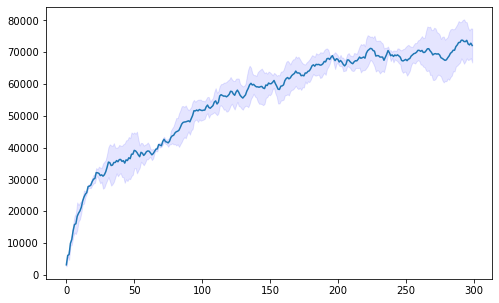

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

TS

In [9]:
# set new believed customer for the learner
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

In [10]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts5_learner = TSLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts5_learner.select_superarm()
        report = environment.round(super_arm)
        ts5_learner.update(super_arm.copy(), report)
    rewards = ts5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%


AttributeError: 'TSLearner5' object has no attribute 'customer'

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)

plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)

plt.show()

In [ ]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2]) / today_customer
seen = np.array(ts_learner4.history_interactions)
theoretical_regret = 1024 * np.log(seen)/delta_arms

In [ ]:
plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()